In [1]:
# Step 1. Mount drive 
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
import os

path = "/content/gdrive/My Drive"
os.chdir(path)

In [3]:
%cd darknetGoogleColab

!ls

# phân quyền execute module darknet
!chmod +x ./darknet

/content/gdrive/My Drive/darknetGoogleColab
1000to15000.log		  obj1.data
10to15_nocrop.log	  obj_291.data
13_16_nocrop.log	  obj_59.data
16to20_nocrop.log	  obj.data
19to23_nocrop.log	  obj_datanocrop.data
1to5_nocrop.log		  object_detection_yolo.py
1to5_nocrop_tt2.log	  obj.names
1to5_nocrop_tt.log	  obj_train.data
3rdparty		  plotTrainLoss.py
5_10_nocrop.log		  predictions.jpg
59image.txt		  README.md
appveyor.yml		  result_datatest_291.txt
backup			  results
bad.list		  result.txt
build			  scripts
build.ps1		  src
build.sh		  test1.txt
cfg			  testold.txt
char0_2000t.png		  test.txt
chart.png		  train_2105.txt
cmake			  traindata
CMakeLists.txt		  training_loss_plot.png
CMakeSettings.json	  train_nocroptest.txt
darknet			  train_nocrop.txt
darknet53.conv_1.74	  train.txt
darknet53.conv.74	  _travis.yml
DarknetConfig.cmake.in	  valid.txt
darknetGoogleColab.ipynb  val_nocroptest.txt
darknet.py		  val_nocrop.txt
darknet_video.py	  video_v2.sh
data			  video_yolov3.sh
_gitignore		  yol

In [ ]:
# from glob import glob 
# import os
# source = '/content/gdrive/My Drive/darknetGoogleColab/traindata/labels/*.txt'
# den = '/content/gdrive/My Drive/darknetGoogleColab/traindata/images'
# a = glob(source)
# print(len(a))
# for i in a:
#   os.rename(i, os.path.join(den, i.split('/')[-1]))
#   # print(i.split('/')[-1])

In [ ]:
# import glob2
# import numpy as np

# all_files = []
# for ext in ["*.png", "*.jpeg", "*.jpg"]:
#   images = glob2.glob(os.path.join("traindata/images/", ext))
#   all_files += images

# rand_idx = np.random.randint(0, len(all_files), 485)

# # Create train.txt
# with open("train.txt", "w") as f:
#   for idx in np.arange(len(all_files)):
#     # if idx not in rand_idx:
#     f.write(all_files[idx]+'\n')

# # Create valid.txt
# with open("valid.txt", "w") as f:
#   for idx in np.arange(len(all_files)):
#     if idx in rand_idx:
#       f.write(all_files[idx]+'\n')

In [ ]:
# # Create obj.names config file
# !echo BENIGN > obj.names
# !echo MALIGNANT >> obj.names

In [ ]:
# !echo classes=2 > obj.data
# !echo train=train.txt >> obj.data
# !echo valid=valid.txt >> obj.data
# !echo names=obj.names >> obj.data
# !echo backup=backup >> obj.data

In [4]:
# os.path.exists("obj.data")
# os.path.exists("yolov3-5c-5000-maxsteps.cfg")
os.chdir('/content/gdrive/My Drive/darknetGoogleColab')

In [4]:
#download files
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()
  
  
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)
      
def download(path):
  from google.colab import files
  files.download(path)

In [ ]:
# !wget https://pjreddie.com/media/files/darknet53.conv.74


In [ ]:
!mkdir backup

mkdir: cannot create directory ‘backup’: File exists


In [ ]:
# !./darknet detector train obj.data yolov3-5c-20000-maxsteps.cfg backup/yolov3-5c-15000-maxsteps_final.weights -dont_show > yolov3-20c.log

CUDA Error: no CUDA-capable device is detected: Success
darknet: ./src/utils.c:293: error: Assertion `0' failed.
/bin/bash: line 1:   600 Aborted                 (core dumped) ./darknet detector train obj.data yolov3-5c-20000-maxsteps.cfg backup/yolov3-5c-15000-maxsteps_final.weights -dont_show > yolov3-20c.log


Retrieving data and plotting training loss graph...
Done! Plot saved as training_loss_plot.png


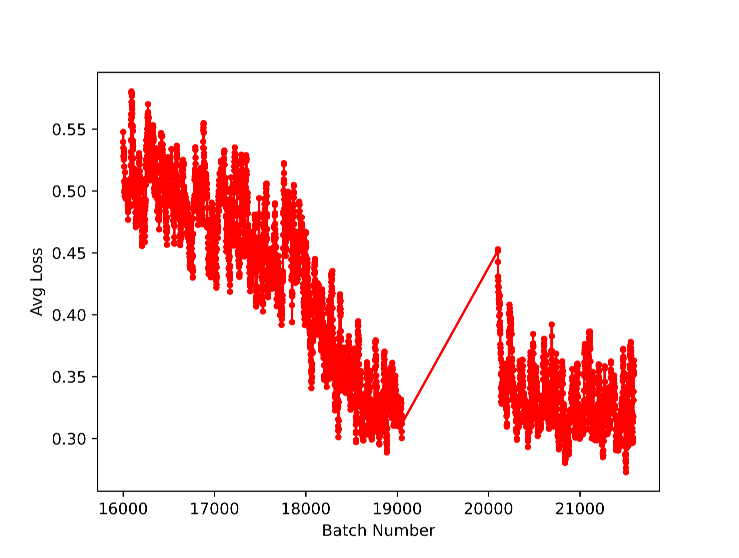

In [7]:
!python3 plotTrainLoss.py 19to23_nocrop.log
imShow('training_loss_plot.png')

In [ ]:
!python3 plotTrainLoss.py yolov3-10c.log -dont_show
imShow('training_loss_plot.png')

In [ ]:
!python3 plotTrainLoss.py yolov3-15c.log
imShow('training_loss_plot.png')

In [ ]:
!python3 plotTrainLoss.py yolov3-20c.log
imShow('training_loss_plot.png')

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32 0.639 BF
   1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64 3.407 BF
   2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32 0.379 BF
   3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128 3.407 BF
   6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64 0.379 BF
   7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128 3.407 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64 0.379 BF
  10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128 3.407 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   152 x 152 x 128   ->    76 x  76 x 256 3.407 BF
  13 conv    128  1 x 1 / 1    76 x  76 x 256   ->    76 x  76 x 128 0.379 BF
  14 c

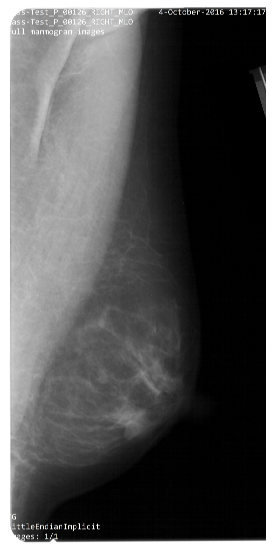

In [ ]:
!./darknet detector test obj.data yolov3-5c-20000-maxsteps.cfg backup/yolov3-5c-20000-maxsteps_last.weights P_00126_RIGHT_MLO_FULL.jpg -dont_show

imShow('predictions.jpg')

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32 0.639 BF
   1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64 3.407 BF
   2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32 0.379 BF
   3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128 3.407 BF
   6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64 0.379 BF
   7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128 3.407 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64 0.379 BF
  10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128 3.407 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   152 x 152 x 128   ->    76 x  76 x 256 3.407 BF
  13 conv    128  1 x 1 / 1    76 x  76 x 256   ->    76 x  76 x 128 0.379 BF
  14 c

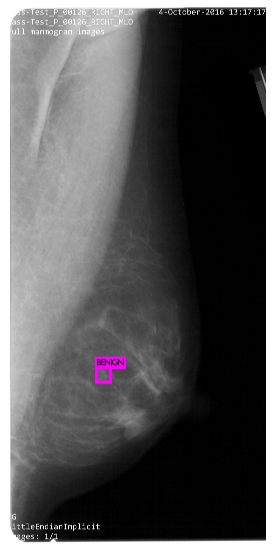

In [ ]:
!./darknet detector test obj.data yolov3-10c-10000-nocrop-maxsteps.cfg backup/yolov3-10c-10000-nocrop-maxsteps_19000.weights P_00126_RIGHT_MLO_FULL.jpg -dont_show

imShow('predictions.jpg')

In [ ]:
!python3 plotTrainLoss.py yolov3-15c.log
imShow('training_loss_plot.png')

# **Model ảnh cắt test ảnh cắt**

In [ ]:
!./darknet detector map obj_291.data yolov3-5c-20000-maxsteps.cfg backup/yolov3-5c-20000-maxsteps_final.weights

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32 0.639 BF
   1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64 3.407 BF
   2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32 0.379 BF
   3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128 3.407 BF
   6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64 0.379 BF
   7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128 3.407 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64 0.379 BF
  10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128 3.407 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   152 x 152 x 128   ->    76 x  76 x 256 3.407 BF
  13 conv    128  1 x 1 / 1    76 x  76 x 256   ->    76 x  76 x 128 0.379 BF
  14 c

# **Model ảnh cắt test ảnh full**

In [5]:
!./darknet detector map obj_datanocrop.data yolov3-5c-20000-maxsteps.cfg backup/yolov3-5c-20000-maxsteps_final.weights

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32 0.639 BF
   1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64 3.407 BF
   2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32 0.379 BF
   3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128 3.407 BF
   6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64 0.379 BF
   7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128 3.407 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64 0.379 BF
  10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128 3.407 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   152 x 152 x 128   ->    76 x  76 x 256 3.407 BF
  13 conv    128  1 x 1 / 1    76 x  76 x 256   ->    76 x  76 x 128 0.379 BF
  14 c

In [6]:
!./darknet detector map obj_datanocrop.data yolov3-5c-20000-maxsteps.cfg backup/yolov3-5c-20000-maxsteps_final.weights

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32 0.639 BF
   1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64 3.407 BF
   2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32 0.379 BF
   3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128 3.407 BF
   6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64 0.379 BF
   7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128 3.407 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64 0.379 BF
  10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128 3.407 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   152 x 152 x 128   ->    76 x  76 x 256 3.407 BF
  13 conv    128  1 x 1 / 1    76 x  76 x 256   ->    76 x  76 x 128 0.379 BF
  14 c

# **model full test ảnh full**

In [ ]:
!./darknet detector map obj_datanocrop.data yolov3-10c-10000-nocrop-maxsteps.cfg backup/yolov3-10c-10000-nocrop-maxsteps_19000.weights

# **Model ảnh full test ảnh cắt**

In [ ]:
!./darknet detector map obj.data yolov3-10c-10000-nocrop-maxsteps.cfg backup/yolov3-10c-10000-nocrop-maxsteps_19000.weights

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32 0.639 BF
   1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64 3.407 BF
   2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32 0.379 BF
   3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128 3.407 BF
   6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64 0.379 BF
   7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128 3.407 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64 0.379 BF
  10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128 3.407 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   152 x 152 x 128   ->    76 x  76 x 256 3.407 BF
  13 conv    128  1 x 1 / 1    76 x  76 x 256   ->    76 x  76 x 128 0.379 BF
  14 c

In [ ]:
!./darknet detector map obj_291.data yolov3-10c-10000-nocrop-maxsteps.cfg backup/yolov3-10c-10000-nocrop-maxsteps_19000.weights

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32 0.639 BF
   1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64 3.407 BF
   2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32 0.379 BF
   3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128 3.407 BF
   6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64 0.379 BF
   7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128 3.407 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64 0.379 BF
  10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128 3.407 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   152 x 152 x 128   ->    76 x  76 x 256 3.407 BF
  13 conv    128  1 x 1 / 1    76 x  76 x 256   ->    76 x  76 x 128 0.379 BF
  14 c

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32 0.639 BF
   1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64 3.407 BF
   2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32 0.379 BF
   3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128 3.407 BF
   6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64 0.379 BF
   7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128 3.407 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64 0.379 BF
  10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128 3.407 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   152 x 152 x 128   ->    76 x  76 x 256 3.407 BF
  13 conv    128  1 x 1 / 1    76 x  76 x 256   ->    76 x  76 x 128 0.379 BF
  14 c

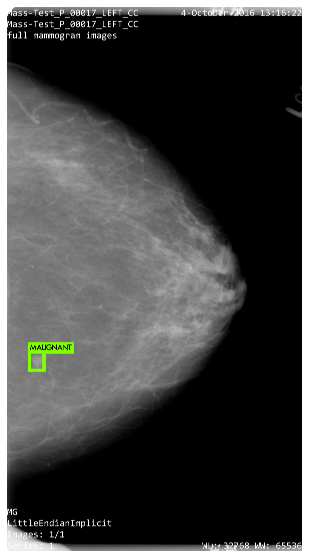

In [ ]:
!./darknet detector test obj.data yolov3-5c-15000-maxsteps.cfg backup/yolov3-5c-15000-maxsteps_last.weights P_00017_LEFT_CC_FULL.jpg -dont_show

imShow('predictions.jpg')

In [ ]:
!./darknet detector train obj1.data yolov3-5c-15000-maxsteps.cfg backup/yolov3-5c-20000-maxsteps_16000.weights -map -dont_show

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32 0.639 BF
   1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64 3.407 BF
   2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32 0.379 BF
   3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128 3.407 BF
   6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64 0.379 BF
   7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128 3.407 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64 0.379 BF
  10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128 3.407 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   152 x 152 x 128   ->    76 x  76 x 256 3.407 BF
  13 conv    128  1 x 1 / 1    76 x  76 x 256   ->    76 x  76 x 128 0.379 BF
  14 c

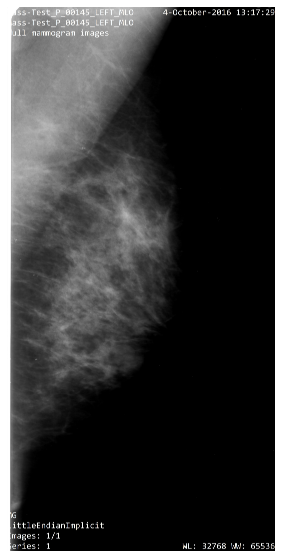

In [ ]:


!./darknet detector test obj.data yolov3-5c-15000-maxsteps.cfg backup/yolov3-5c-15000-maxsteps_last.weights P_00145_LEFT_MLO_FULL.jpg -dont_show

imShow('predictions.jpg')

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32 0.639 BF
   1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64 3.407 BF
   2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32 0.379 BF
   3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128 3.407 BF
   6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64 0.379 BF
   7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128 3.407 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64 0.379 BF
  10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128 3.407 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   152 x 152 x 128   ->    76 x  76 x 256 3.407 BF
  13 conv    128  1 x 1 / 1    76 x  76 x 256   ->    76 x  76 x 128 0.379 BF
  14 c

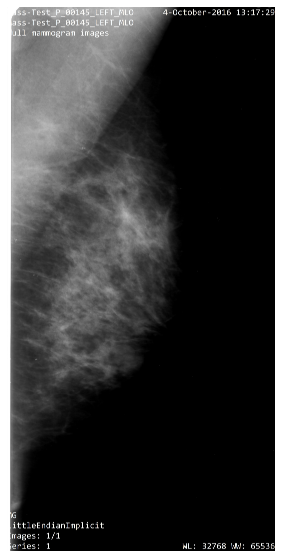

In [ ]:
!./darknet detector test obj.data yolov3-5c-15000-maxsteps.cfg backup/yolov3-5c-15000-maxsteps_last.weights P_00145_LEFT_MLO_FULL.jpg -dont_show
imShow('predictions.jpg')

In [ ]:
!./darknet detector map obj1.data yolov3-5c-15000-maxsteps.cfg backup/yolov3-5c-15000-maxsteps_15000.weights

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32 0.639 BF
   1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64 3.407 BF
   2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32 0.379 BF
   3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128 3.407 BF
   6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64 0.379 BF
   7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128 3.407 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64 0.379 BF
  10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128 3.407 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   152 x 152 x 128   ->    76 x  76 x 256 3.407 BF
  13 conv    128  1 x 1 / 1    76 x  76 x 256   ->    76 x  76 x 128 0.379 BF
  14 c

In [ ]:
!./darknet detector map obj2.data yolov3-5c-15000-maxsteps.cfg backup/yolov3-5c-15000-maxsteps_15000.weights

In [ ]:
!./darknet detector map obj1.data yolov3-5c-15000-maxsteps.cfg backup/yolov3-5c-20000-maxsteps_16000.weights

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32 0.639 BF
   1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64 3.407 BF
   2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32 0.379 BF
   3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128 3.407 BF
   6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64 0.379 BF
   7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128 3.407 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64 0.379 BF
  10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128 3.407 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   152 x 152 x 128   ->    76 x  76 x 256 3.407 BF
  13 conv    128  1 x 1 / 1    76 x  76 x 256   ->    76 x  76 x 128 0.379 BF
  14 c

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32 0.639 BF
   1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64 3.407 BF
   2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32 0.379 BF
   3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128 3.407 BF
   6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64 0.379 BF
   7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128 3.407 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64 0.379 BF
  10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128 3.407 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   152 x 152 x 128   ->    76 x  76 x 256 3.407 BF
  13 conv    128  1 x 1 / 1    76 x  76 x 256   ->    76 x  76 x 128 0.379 BF
  14 c

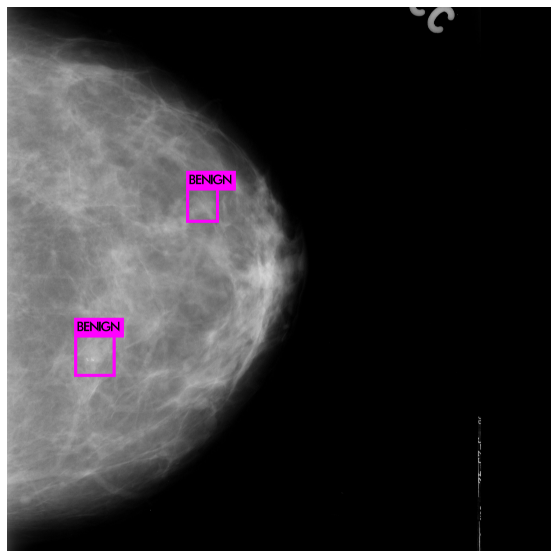

In [ ]:
!./darknet detector test obj.data yolov3-5c-20000-maxsteps.cfg backup/yolov3-5c-20000-maxsteps_16000.weights P_00284_LEFT_CC_FULL.jpg -dont_show
imShow('predictions.jpg')

In [ ]:
!./darknet detector test obj.data yolov3-5c-20000-maxsteps.cfg backup/yolov3-5c-20000-maxsteps_16000.weights -thresh 0.25 -dont_show -save_labels < test.txt

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32 0.639 BF
   1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64 3.407 BF
   2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32 0.379 BF
   3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128 3.407 BF
   6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64 0.379 BF
   7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128 3.407 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64 0.379 BF
  10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128 3.407 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   152 x 152 x 128   ->    76 x  76 x 256 3.407 BF
  13 conv    128  1 x 1 / 1    76 x  76 x 256   ->    76 x  76 x 128 0.379 BF
  14 c

In [ ]:
# -ext_output < test.txt > result.txt
!./darknet detector test obj_291.data yolov3-5c-20000-maxsteps.cfg backup/yolov3-5c-20000-maxsteps_16000.weights -thresh 0.25 -dont_show -ext_output < test.txt > result_291.txt

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32 0.639 BF
   1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64 3.407 BF
   2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32 0.379 BF
   3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128 3.407 BF
   6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64 0.379 BF
   7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128 3.407 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64 0.379 BF
  10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128 3.407 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   152 x 152 x 128   ->    76 x  76 x 256 3.407 BF
  13 conv    128  1 x 1 / 1    76 x  76 x 256   ->    76 x  76 x 128 0.379 BF
  14 c

In [ ]:
# import cv2 

# img = 'traindata/data_test/P_00967_RIGHT_MLO_FULL.jpg'
# # cv2.imread(img)

# imShow(img)
!sudo apt install dos2unix
!dos2unix obj_59.data

Reading package lists... Done
Building dependency tree       
Reading state information... Done
dos2unix is already the newest version (7.3.4-3).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
dos2unix: converting file obj_59.data to Unix format...


In [ ]:
!./darknet detector map obj_train.data yolov3-5c-20000-maxsteps.cfg backup/yolov3-5c-20000-maxsteps_16000.weights

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32 0.639 BF
   1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64 3.407 BF
   2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32 0.379 BF
   3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128 3.407 BF
   6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64 0.379 BF
   7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128 3.407 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64 0.379 BF
  10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128 3.407 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   152 x 152 x 128   ->    76 x  76 x 256 3.407 BF
  13 conv    128  1 x 1 / 1    76 x  76 x 256   ->    76 x  76 x 128 0.379 BF
  14 c

In [ ]:
!./darknet detector test obj_train.data yolov3-5c-20000-maxsteps.cfg backup/yolov3-5c-20000-maxsteps_16000.weights -thresh 0.25 -dont_show -ext_output < train.txt > result.txt

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32 0.639 BF
   1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64 3.407 BF
   2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32 0.379 BF
   3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128 3.407 BF
   6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64 0.379 BF
   7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128 3.407 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64 0.379 BF
  10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128 3.407 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   152 x 152 x 128   ->    76 x  76 x 256 3.407 BF
  13 conv    128  1 x 1 / 1    76 x  76 x 256   ->    76 x  76 x 128 0.379 BF
  14 c

Couldn't open file: yolo.data


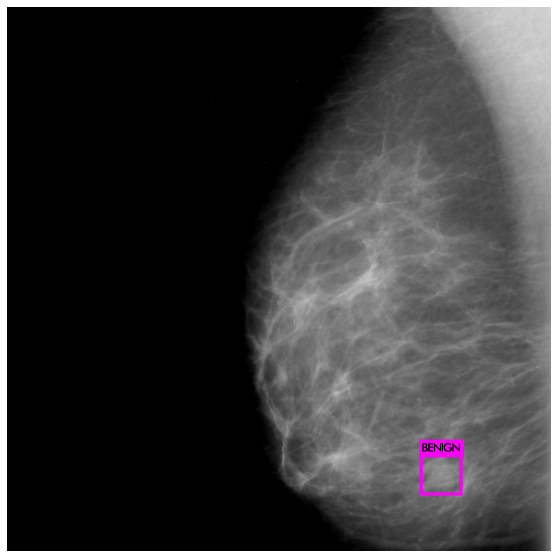

In [ ]:
!./darknet detector test obj.data yolov3_new_lr000001.cfg backup/yolov3_new_lr000001_4000.weights P_00284_LEFT_CC_FULL.jpg -dont_show
imShow('predictions.jpg')

In [ ]:
!./darknet detector map obj.data yolov3_new_lr000001.cfg backup/yolov3_new_lr000001_4000.weights 

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32 0.639 BF
   1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64 3.407 BF
   2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32 0.379 BF
   3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128 3.407 BF
   6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64 0.379 BF
   7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128 3.407 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64 0.379 BF
  10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128 3.407 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   152 x 152 x 128   ->    76 x  76 x 256 3.407 BF
  13 conv    128  1 x 1 / 1    76 x  76 x 256   ->    76 x  76 x 128 0.379 BF
  14 c

In [ ]:
!./darknet detector map obj_59.data yolov3-5c-20000-maxsteps.cfg backup/yolov3-5c-20000-maxsteps_16000.weights -thresh 0.5 -dont_show

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32 0.639 BF
   1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64 3.407 BF
   2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32 0.379 BF
   3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128 3.407 BF
   6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64 0.379 BF
   7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128 3.407 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64 0.379 BF
  10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128 3.407 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   152 x 152 x 128   ->    76 x  76 x 256 3.407 BF
  13 conv    128  1 x 1 / 1    76 x  76 x 256   ->    76 x  76 x 128 0.379 BF
  14 c

In [ ]:
# !unzip traindata/data_test_add_traindataa.zip -d traindata

In [ ]:
# import os
# from glob import glob
# link = glob('/content/gdrive/My Drive/darknetGoogleColab/traindata/data_test_add_traindataa/*jpg')
# for i in link:
#   with open('/content/gdrive/My Drive/darknetGoogleColab/test.txt', 'a') as fs:
#     fs.writelines(i + '\n')
  


In [ ]:
!./darknet detector map obj_291.data yolov3-5c-20000-maxsteps.cfg backup/yolov3-5c-20000-maxsteps_16000.weights -threshold 0.4 -dont_show

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32 0.639 BF
   1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64 3.407 BF
   2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32 0.379 BF
   3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128 3.407 BF
   6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64 0.379 BF
   7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128 3.407 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64 0.379 BF
  10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128 3.407 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   152 x 152 x 128   ->    76 x  76 x 256 3.407 BF
  13 conv    128  1 x 1 / 1    76 x  76 x 256   ->    76 x  76 x 128 0.379 BF
  14 c

In [ ]:
!./darknet detector map obj_291.data yolov3_new_lr000001.cfg backup/yolov3_new_lr000001_4000.weights -dont_show

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32 0.639 BF
   1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64 3.407 BF
   2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32 0.379 BF
   3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128 3.407 BF
   6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64 0.379 BF
   7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128 3.407 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64 0.379 BF
  10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128 3.407 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   152 x 152 x 128   ->    76 x  76 x 256 3.407 BF
  13 conv    128  1 x 1 / 1    76 x  76 x 256   ->    76 x  76 x 128 0.379 BF
  14 c